In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [3]:
# Importing the dataset
train = pd.read_csv('train_hr.csv', index_col=0)
train.head()

department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing  region_19        Bachelor's      m   
2542         Sales & Marketing  region_23        Bachelor's      m   
48945               Technology  region_26        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   
2542                      other                2   39                   1.0   
48945                     other                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
65438                        49            0  
65141                        60            0  
7513                         50            0  
2542                         50            0  
48945                        73            0

In [4]:
# getting their shapes
print("Shape of train :", train.shape)

Shape of train : (54808, 13)


In [5]:
# describing the training set

train.describe(include = 'all')

department    region   education gender recruitment_channel  \
count               54808     54808       52399  54808               54808   
unique                  9        34           3      2                   3   
top     Sales & Marketing  region_2  Bachelor's      m               other   
freq                16840     12343       36669  38496               30446   
mean                  NaN       NaN         NaN    NaN                 NaN   
std                   NaN       NaN         NaN    NaN                 NaN   
min                   NaN       NaN         NaN    NaN                 NaN   
25%                   NaN       NaN         NaN    NaN                 NaN   
50%                   NaN       NaN         NaN    NaN                 NaN   
75%                   NaN       NaN         NaN    NaN                 NaN   
max                   NaN       NaN         NaN    NaN                 NaN   

        no_of_trainings           age  previous_year_rating  \
count      54808.000000  54808.000000          50684.000000   
unique              NaN           NaN                   NaN   
top                 NaN           NaN                   NaN   
freq                NaN           NaN                   NaN   
mean           1.253011     34.803915              3.329256   
std            0.609264      7.660169              1.259993   
min            1.000000     20.000000              1.000000   
25%            1.000000     29.000000              3.000000   
50%            1.000000     33.000000              3.000000   
75%            1.000000     39.000000              4.000000   
max           10.000000     60.000000              5.000000   

        length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count        54808.000000   54808.000000  54808.000000        54808.000000   
unique                NaN            NaN           NaN                 NaN   
top                   NaN            NaN           NaN                 NaN   
freq                  NaN            NaN           NaN                 NaN   
mean             5.865512       0.351974      0.023172           63.386750   
std              4.265094       0.477590      0.150450           13.371559   
min              1.000000       0.000000      0.000000           39.000000   
25%              3.000000       0.000000      0.000000           51.000000   
50%              5.000000       0.000000      0.000000           60.000000   
75%              7.000000       1.000000      0.000000           76.000000   
max             37.000000       1.000000      1.000000           99.000000   

         is_promoted  
count   54808.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.085170  
std         0.279137  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [7]:
# checking if there is any NULL value in the dataset

train.isnull().any()

department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [8]:
# looking at the most popular departments

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [9]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


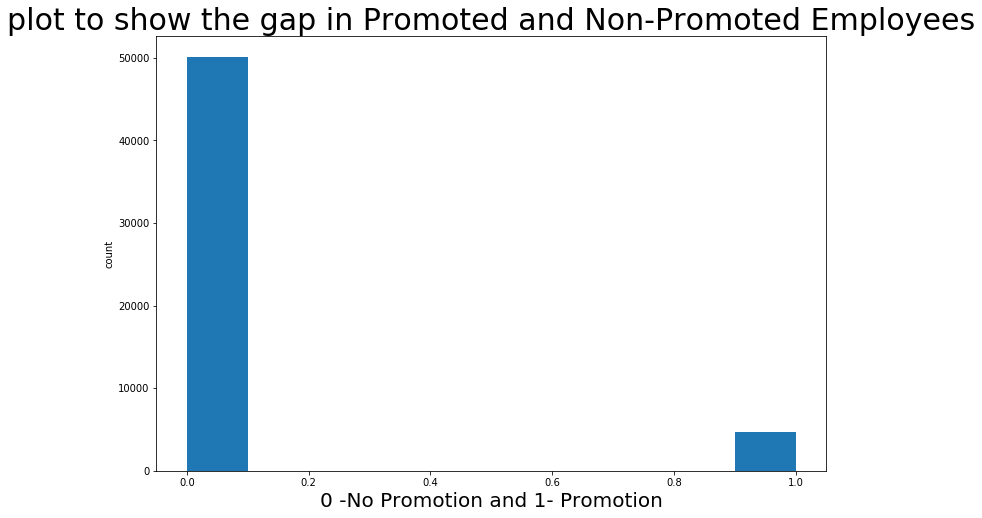

In [11]:
plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

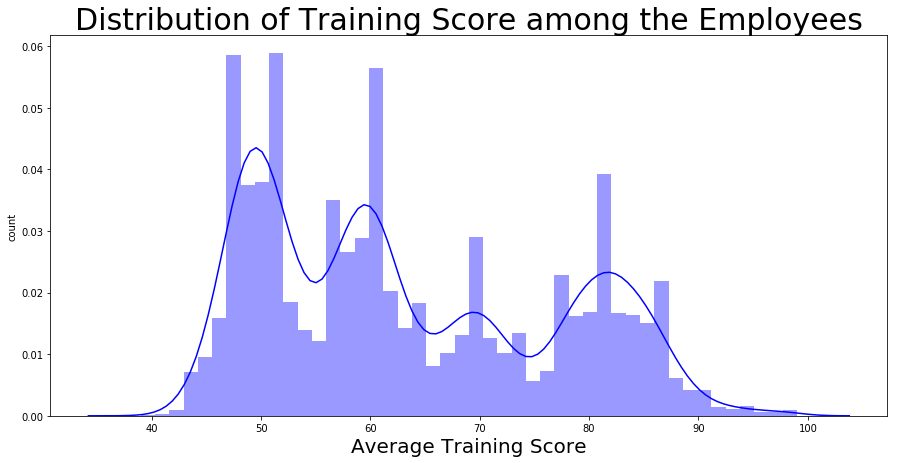

In [12]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [13]:
#Data Pre-processing
#filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [14]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [16]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [17]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Using TensorFlow backend.


Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [18]:
#over sampling of the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.25, 
                                                    random_state = 0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (75210, 58)
Shape of x_valid:  (25070, 58)
Shape of y_train:  (75210, 1)
Shape of y_valid:  (25070, 1)


In [19]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#Average Ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [21]:
lr=LogisticRegression()
adb=AdaBoostClassifier()
rfr=RandomForestClassifier()
gbm=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
bag=BaggingClassifier()
dtr=DecisionTreeClassifier()
lda=LinearDiscriminantAnalysis()
gnb=GaussianNB()

In [22]:
lr.fit(X_train, y_train)
models.append('Logistic Regression')
adb.fit(X_train, y_train)
models.append('AdaBoost Classifier')
rfr.fit(X_train, y_train)
models.append('RandomForest Classifier')
gbm.fit(X_train, y_train)
models.append('GradientBoosting Classifier')
etc.fit(X_train, y_train)
models.append('ExtraTrees Classifier')
bag.fit(X_train, y_train)
models.append('Bagging Classifier')
dtr.fit(X_train, y_train)
models.append('DecisionTree Classifier')
lda.fit(X_train, y_train)
models.append('LinearDiscriminantAnalysis')
gnb.fit(X_train, y_train)
models.append('GaussianNB')

In [23]:
# Fitting Voting Classifier Classification to the Training set
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('Logistic Regression',lr),
                                   ('AdaBoost Classifier',adb),
                                   ('DecisionTree Classifier',dtr),
                                   ('RandomForest Classifier',rfr),
                                   ('GradientBoosting Classifier',gbm),
                                 ('ExtraTrees Classifier',etc),
                                 ('Bagging Classifier',bag),
                                 ('LinearDiscriminantAnalysis',lda),
                                 ('GaussianNB',gnb)], 
                       voting='hard')
                       #flatten_transform=True)
vc.fit(X_train, y_train)
models.append('Average Ensemble')

In [24]:
models

['Logistic Regression',
 'AdaBoost Classifier',
 'RandomForest Classifier',
 'GradientBoosting Classifier',
 'ExtraTrees Classifier',
 'Bagging Classifier',
 'DecisionTree Classifier',
 'LinearDiscriminantAnalysis',
 'GaussianNB',
 'Average Ensemble']

In [25]:
#Evaluation through confusion matrix
from sklearn.metrics import (confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score)

In [26]:
print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test)))
print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test)))
acc.append(accuracy_score(y_test, lr.predict(X_test)))
print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test)))
precision.append(precision_score(y_test, lr.predict(X_test)))
print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test)))
recall.append(recall_score(y_test, lr.predict(X_test)))
print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test)))
f1.append(f1_score(y_test, lr.predict(X_test)))

Confusion Matrix for LR: 
 [[ 9627  2830]
 [ 2017 10596]]
Accuracy for LR: 
 0.80666134822497
Precision for LR: 
 0.7892149560554149
Recall for LR: 
 0.840085625941489
f1_score for LR: 
 0.8138561388686203


In [27]:
print('Confusion Matrix for ADB: \n',confusion_matrix(y_test, adb.predict(X_test)))
print('Accuracy for ADB: \n',accuracy_score(y_test, adb.predict(X_test)))
acc.append(accuracy_score(y_test, adb.predict(X_test)))
print('Precision for ADB: \n',precision_score(y_test, adb.predict(X_test)))
precision.append(precision_score(y_test, adb.predict(X_test)))
print('Recall for ADB: \n',recall_score(y_test, adb.predict(X_test)))
recall.append(recall_score(y_test, adb.predict(X_test)))
print('f1_score for ADB: \n',f1_score(y_test, adb.predict(X_test)))
f1.append(f1_score(y_test, adb.predict(X_test)))

Confusion Matrix for ADB: 
 [[11394  1063]
 [ 1517 11096]]
Accuracy for ADB: 
 0.8970881531711209
Precision for ADB: 
 0.9125750472900732
Recall for ADB: 
 0.8797272655197019
f1_score for ADB: 
 0.8958501533989988


In [28]:
print('Confusion Matrix for RFR: \n',confusion_matrix(y_test, rfr.predict(X_test)))
print('Accuracy for RFR: \n',accuracy_score(y_test, rfr.predict(X_test)))
acc.append(accuracy_score(y_test, rfr.predict(X_test)))
print('Precision for RFR: \n',precision_score(y_test, rfr.predict(X_test)))
precision.append(precision_score(y_test, rfr.predict(X_test)))
print('Recall for RFR: \n',recall_score(y_test, rfr.predict(X_test)))
recall.append(recall_score(y_test, rfr.predict(X_test)))
print('f1_score for RFR: \n',f1_score(y_test, rfr.predict(X_test)))
f1.append(f1_score(y_test, rfr.predict(X_test)))

Confusion Matrix for RFR: 
 [[12268   189]
 [  754 11859]]
Accuracy for RFR: 
 0.9623853211009175
Precision for RFR: 
 0.984312749003984
Recall for RFR: 
 0.9402204075160548
f1_score for RFR: 
 0.9617614857467255


In [29]:
print('Confusion Matrix for GBM: \n',confusion_matrix(y_test, gbm.predict(X_test)))
print('Accuracy for GBM: \n',accuracy_score(y_test, gbm.predict(X_test)))
acc.append(accuracy_score(y_test, gbm.predict(X_test)))
print('Precision for GBM: \n',precision_score(y_test, gbm.predict(X_test)))
precision.append(precision_score(y_test, gbm.predict(X_test)))
print('Recall for GBM: \n',recall_score(y_test, gbm.predict(X_test)))
recall.append(recall_score(y_test, gbm.predict(X_test)))
print('f1_score for GBM: \n',f1_score(y_test, gbm.predict(X_test)))
f1.append(f1_score(y_test, gbm.predict(X_test)))

Confusion Matrix for GBM: 
 [[12204   253]
 [ 1022 11591]]
Accuracy for GBM: 
 0.949142401276426
Precision for GBM: 
 0.9786389733198244
Recall for GBM: 
 0.9189724887021328
f1_score for GBM: 
 0.9478676861430266


In [30]:
print('Confusion Matrix for ETC: \n',confusion_matrix(y_test, etc.predict(X_test)))
print('Accuracy for ETC: \n',accuracy_score(y_test, etc.predict(X_test)))
acc.append(accuracy_score(y_test, etc.predict(X_test)))
print('Precision for ETC: \n',precision_score(y_test, etc.predict(X_test)))
precision.append(precision_score(y_test, etc.predict(X_test)))
print('Recall for ETC: \n',recall_score(y_test, etc.predict(X_test)))
recall.append(recall_score(y_test, etc.predict(X_test)))
print('f1_score for ETC: \n',f1_score(y_test, etc.predict(X_test)))
f1.append(f1_score(y_test, etc.predict(X_test)))

Confusion Matrix for ETC: 
 [[12171   286]
 [  667 11946]]
Accuracy for ETC: 
 0.9619864379736737
Precision for ETC: 
 0.9766187050359713
Recall for ETC: 
 0.9471180528026639
f1_score for ETC: 
 0.9616421815254579


In [31]:
print('Confusion Matrix for BAG: \n',confusion_matrix(y_test, bag.predict(X_test)))
print('Accuracy for BAG: \n',accuracy_score(y_test, bag.predict(X_test)))
acc.append(accuracy_score(y_test, bag.predict(X_test)))
print('Precision for BAG: \n',precision_score(y_test, bag.predict(X_test)))
precision.append(precision_score(y_test, bag.predict(X_test)))
print('Recall for BAG: \n',recall_score(y_test, bag.predict(X_test)))
recall.append(recall_score(y_test, bag.predict(X_test)))
print('f1_score for BAG: \n',f1_score(y_test, bag.predict(X_test)))
f1.append(f1_score(y_test, bag.predict(X_test)))

Confusion Matrix for BAG: 
 [[12202   255]
 [  683 11930]]
Accuracy for BAG: 
 0.9625847626645393
Precision for BAG: 
 0.979072630283135
Recall for BAG: 
 0.9458495203361611
f1_score for BAG: 
 0.9621743689007176


In [32]:
print('Confusion Matrix for DTR: \n',confusion_matrix(y_test, dtr.predict(X_test)))
print('Accuracy for DTR: \n',accuracy_score(y_test, dtr.predict(X_test)))
acc.append(accuracy_score(y_test, dtr.predict(X_test)))
print('Precision for DTR: \n',precision_score(y_test, dtr.predict(X_test)))
precision.append(precision_score(y_test, dtr.predict(X_test)))
print('Recall for DTR: \n',recall_score(y_test, dtr.predict(X_test)))
recall.append(recall_score(y_test, dtr.predict(X_test)))
print('f1_score for DTR: \n',f1_score(y_test, dtr.predict(X_test)))
f1.append(f1_score(y_test, dtr.predict(X_test)))

Confusion Matrix for DTR: 
 [[11677   780]
 [  625 11988]]
Accuracy for DTR: 
 0.9439569206222577
Precision for DTR: 
 0.9389097744360902
Recall for DTR: 
 0.9504479505272339
f1_score for DTR: 
 0.944643631062606


In [33]:
print('Confusion Matrix for LDA: \n',confusion_matrix(y_test, lda.predict(X_test)))
print('Accuracy for LDA: \n',accuracy_score(y_test, lda.predict(X_test)))
acc.append(accuracy_score(y_test, lda.predict(X_test)))
print('Precision for LDA: \n',precision_score(y_test, lda.predict(X_test)))
precision.append(precision_score(y_test, lda.predict(X_test)))
print('Recall for LDA: \n',recall_score(y_test, lda.predict(X_test)))
recall.append(recall_score(y_test, lda.predict(X_test)))
print('f1_score for LDA: \n',f1_score(y_test, lda.predict(X_test)))
f1.append(f1_score(y_test, lda.predict(X_test)))

Confusion Matrix for LDA: 
 [[ 9260  3197]
 [ 2184 10429]]
Accuracy for LDA: 
 0.7853609892301555
Precision for LDA: 
 0.7653750183472773
Recall for LDA: 
 0.8268453183223659
f1_score for LDA: 
 0.7949235870269448


In [34]:
print('Confusion Matrix for GNB: \n',confusion_matrix(y_test, gnb.predict(X_test)))
print('Accuracy for GNB: \n',accuracy_score(y_test, gnb.predict(X_test)))
acc.append(accuracy_score(y_test, gnb.predict(X_test)))
print('Precision for GNB: \n',precision_score(y_test, gnb.predict(X_test)))
precision.append(precision_score(y_test, gnb.predict(X_test)))
print('Recall for GNB: \n',recall_score(y_test, gnb.predict(X_test)))
recall.append(recall_score(y_test, gnb.predict(X_test)))
print('f1_score for GNB: \n',f1_score(y_test, gnb.predict(X_test)))
f1.append(f1_score(y_test, gnb.predict(X_test)))

Confusion Matrix for GNB: 
 [[ 4878  7579]
 [ 2046 10567]]
Accuracy for GNB: 
 0.6160749900279218
Precision for GNB: 
 0.5823321944230133
Recall for GNB: 
 0.8377864108459526
f1_score for GNB: 
 0.6870834552488702


In [35]:
print('Confusion Matrix for VC: \n',confusion_matrix(y_test, vc.predict(X_test)))
print('Accuracy for VC: \n',accuracy_score(y_test, vc.predict(X_test)))
acc.append(accuracy_score(y_test, vc.predict(X_test)))
print('Precision for VC: \n',precision_score(y_test, vc.predict(X_test)))
precision.append(precision_score(y_test, vc.predict(X_test)))
print('Recall for VC: \n',recall_score(y_test, vc.predict(X_test)))
recall.append(recall_score(y_test, vc.predict(X_test)))
print('f1_score for VC: \n',f1_score(y_test, vc.predict(X_test)))
f1.append(f1_score(y_test, vc.predict(X_test)))

Confusion Matrix for VC: 
 [[11961   496]
 [  602 12011]]
Accuracy for VC: 
 0.9562026326286398
Precision for VC: 
 0.9603422083633165
Recall for VC: 
 0.9522714659478316
f1_score for VC: 
 0.9562898089171974


In [36]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}

In [37]:
model_df = pd.DataFrame(model_dict)
model_df

Models  Accuracies  Precision    Recall  f1-score
0          Logistic Regression    0.806661   0.789215  0.840086  0.813856
1          AdaBoost Classifier    0.897088   0.912575  0.879727  0.895850
2      RandomForest Classifier    0.962385   0.984313  0.940220  0.961761
3  GradientBoosting Classifier    0.949142   0.978639  0.918972  0.947868
4        ExtraTrees Classifier    0.961986   0.976619  0.947118  0.961642
5           Bagging Classifier    0.962585   0.979073  0.945850  0.962174
6      DecisionTree Classifier    0.943957   0.938910  0.950448  0.944644
7   LinearDiscriminantAnalysis    0.785361   0.765375  0.826845  0.794924
8                   GaussianNB    0.616075   0.582332  0.837786  0.687083
9             Average Ensemble    0.956203   0.960342  0.952271  0.956290

In [38]:
model_df = model_df.sort_values(['Accuracies', 'f1-score', 'Recall', 'Precision'],
                               ascending=False)

In [39]:
model_df

Models  Accuracies  Precision    Recall  f1-score
5           Bagging Classifier    0.962585   0.979073  0.945850  0.962174
2      RandomForest Classifier    0.962385   0.984313  0.940220  0.961761
4        ExtraTrees Classifier    0.961986   0.976619  0.947118  0.961642
9             Average Ensemble    0.956203   0.960342  0.952271  0.956290
3  GradientBoosting Classifier    0.949142   0.978639  0.918972  0.947868
6      DecisionTree Classifier    0.943957   0.938910  0.950448  0.944644
1          AdaBoost Classifier    0.897088   0.912575  0.879727  0.895850
0          Logistic Regression    0.806661   0.789215  0.840086  0.813856
7   LinearDiscriminantAnalysis    0.785361   0.765375  0.826845  0.794924
8                   GaussianNB    0.616075   0.582332  0.837786  0.687083

In [40]:
best_model = model_df['Models'].values[0]
best_model

'Bagging Classifier'

In [41]:
#Hyper Parameter Tuning
from sklearn.model_selection import cross_val_score

In [42]:
accuracies=cross_val_score(estimator=etc,
                          X=X_train,
                          y=y_train,
                          cv=10)
accMean=accuracies.mean()
accStd=accuracies.std()

In [44]:
accMean

0.9599919476635981

In [46]:
accStd

0.0018055971650031415

In [47]:
accuracies

array([0.9579899 , 0.96330763, 0.96171231, 0.96184018, 0.95878208,
       0.95918096, 0.9597128 , 0.95864362, 0.95757979, 0.96117021])

In [48]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

In [49]:
# Define scorer
def f1_metric(y_test, y_pred):
    score = f1_score(y_test, y_pred)
    return score
def roc_metric(y_test, y_pred):
    score = roc_auc_score(y_test, y_pred)
    return score

In [50]:
roc_auc_scorer = make_scorer(roc_metric,greater_is_better=True)
f1_scorer = make_scorer(f1_metric,greater_is_better=True)

In [51]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [5, 7, 10],
              "criterion":['gini','entropy'],
              "max_depth": [3,4,5],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}

grid_search = GridSearchCV(estimator = etc,
                           param_grid = parameters,
                           scoring = f1_scorer,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [52]:
best_accuracy = grid_search.best_score_

In [53]:
best_accuracy

0.7853849798969263

In [54]:
best_parameters = grid_search.best_params_

In [55]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.005,
 'n_estimators': 7}

In [56]:
# Fitting Final Model on training set
from sklearn.ensemble import ExtraTreesClassifier
tunedETC = ExtraTreesClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedETC.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=5, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=20,
                     min_weight_fraction_leaf=0.005, n_estimators=7,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [57]:
print('Confusion Matrix for Tuned ETC: \n',confusion_matrix(y_test, tunedETC.predict(X_test)))
print('Accuracy for Tuned ETC: \n',accuracy_score(y_test, tunedETC.predict(X_test)))
acc.append(accuracy_score(y_test, tunedETC.predict(X_test)))
print('Precision for Tuned ETC: \n',precision_score(y_test, tunedETC.predict(X_test)))
precision.append(precision_score(y_test, tunedETC.predict(X_test)))
print('Recall for Tuned ETC: \n',recall_score(y_test, tunedETC.predict(X_test)))
recall.append(recall_score(y_test, tunedETC.predict(X_test)))
print('f1_score for Tuned ETC: \n',f1_score(y_test, tunedETC.predict(X_test)))
f1.append(f1_score(y_test, tunedETC.predict(X_test)))

Confusion Matrix for Tuned ETC: 
 [[ 8931  3526]
 [ 2330 10283]]
Accuracy for Tuned ETC: 
 0.766414040686079
Precision for Tuned ETC: 
 0.744659280179593
Recall for Tuned ETC: 
 0.8152699595655276
f1_score for Tuned ETC: 
 0.7783665127545228
